# <font color='black'>Project: Insurance Cost Analysis</font>

A project to perform analytics operations on an insurance database that uses the bellow mentioned parameters. 
### Objetives: 
* Load the dataframe 
* Clean the data, taking care of the blank entries 
* Run Exploratory Data Analysis (EDA) 
* Identify the attributes that most affect the charges
* Develop a Linear Regression Model for predicting the charges 
* Use Ridge Regression to refine the performance of Linear Regression models.

### SETUP 
* pandas for managing the data.
* numpy for mathematical operations.
* sklearn for machine learning and machine-learning-pipeline related functions.
* seaborn for visualizing the data.
* matplotlib for additional plotting tools.


### Importing Required Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

### Download the dataset

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [4]:
df = pd.read_csv(path)
df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [6]:
### Add the headers to the dataframe 
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [7]:
### Replace NaN values 
df.replace('?',np.nan, inplace=True)

### Data Wragling 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


### Handle missing data 
* For continues attributes I replace with the mean 
* For categorical attributes I replace with the most frequent value

In [12]:
# Smoker is categorical 
is_smoker = df['smoker'].value_counts().idxmax()
df['smoker'].replace(np.nan, is_smoker, inplace=True)

# Age is continues variable 
mean_age = df['age'].astype('float').mean(axis=0)
df['age'].replace(np.nan, mean_age, inplace=True)

# Update data types 
df[['age','smoker']] = df[['age','smoker']].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


In [13]:
# round the charges to nearest 2 decimal places 
df[['charges']] = np.round(df[['charges']],2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


### Exploratory Data Analysis (EDA)

<function matplotlib.pyplot.ylim(*args, **kwargs)>

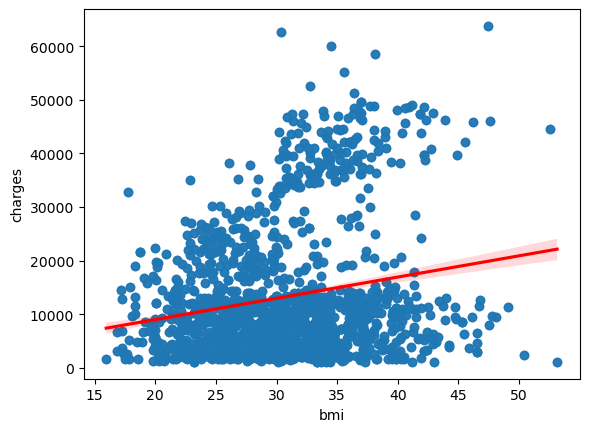

In [16]:
# lets see the regression plot for charges with respect to bmi 
sns.regplot(x='bmi', y='charges',data=df, line_kws={'color':'red'})
plt.ylim

<Axes: xlabel='smoker', ylabel='charges'>

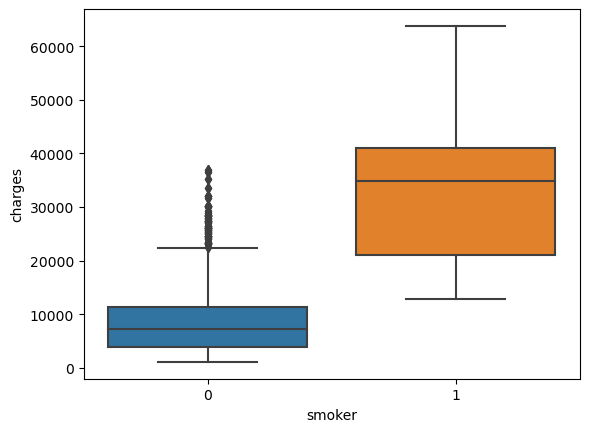

In [17]:
# lets the boxplot for charges with respect to smoker 
sns.boxplot(x='smoker',y='charges',data=df)

<Axes: >

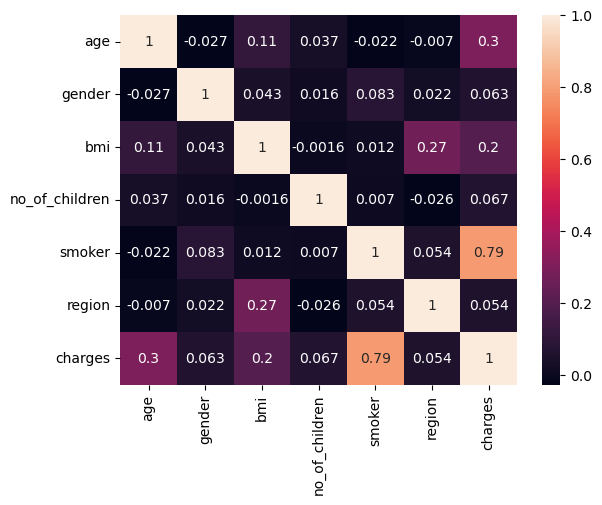

In [18]:
# Lets analysis the correlation with matrix for the dataset 
correlation = df.corr()
sns.heatmap(correlation, annot=True)

### Observation: 
* We have a strong correlation between smoker and charges 

### Model Development 
Lets fit a Linear Regression model that may be used to predict the charges value.

In [25]:
x = df[['age','gender','bmi','smoker','no_of_children','region']]
y = df['charges']

In [26]:
ln = LinearRegression()
ln.fit(x,y)
print(ln.score(x,y))

0.7505888664568174


In [30]:
# Let's improve the model using training pipeline 
# that uses StandardScaler(), PolynomialFeatures() and LinearRegression()
Input = [('scale', StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
x = x.astype(float)
pipe.fit(x,y)
ypipe = pipe.predict(x)
print(r2_score(y,ypipe))

0.8453562217039814


### Model Refinement 
Split the data into trainning and testing subsets, assuming that 20% of the data will be reserverd for testing 

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [32]:
# Fit the Ridge Model 
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train,y_train)

# Predict on the test dataset 
yhat= RidgeModel.predict(x_test)
print(r2_score(y_test, yhat))

0.7254198858412229


In [34]:
# Apply polynomial transformation to the training parameters with degree=2
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

# Using Ridge Model again 
RidgeModel.fit(x_train_pr,y_train)
yhat= RidgeModel.predict(x_test_pr)
print(r2_score(y_test,yhat))

0.8208413195172473


### Observation: 
* We can observe that the Ridge Model did not offer major changes to the accuracy of our model and the fit result of the previous model was better.

### Conclusion:
* MODEL WAS ABLE TO ACHIEVE ACCEPTABLE ACCURACY AND WAS ABLE TO PREDICT THE CORRECT CHARGE IN 84.53% THE DATASET